<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

Загружаем необходимые библиотеки 

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt  
import pandas as pd  
import seaborn as sns  
from sklearn.model_selection import train_test_split
from random import randint



Загружаем дата сет

In [2]:
data = pd.read_csv('/datasets/insurance.csv')

Проверяем дата сет

In [3]:
data.info()
data.drop_duplicates()
print()
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [4]:
print(data.head())

   Пол  Возраст  Зарплата  Члены семьи  Страховые выплаты
0    1     41.0   49600.0            1                  0
1    0     46.0   38000.0            1                  1
2    0     29.0   21000.0            0                  0
3    0     21.0   41700.0            2                  0
4    1     28.0   26100.0            0                  0


Смотрим зависимость признаков

                        Пол   Возраст  Зарплата  Члены семьи  \
Пол                1.000000  0.002074  0.014910    -0.008991   
Возраст            0.002074  1.000000 -0.019093    -0.006692   
Зарплата           0.014910 -0.019093  1.000000    -0.030296   
Члены семьи       -0.008991 -0.006692 -0.030296     1.000000   
Страховые выплаты  0.010140  0.651030 -0.014963    -0.036290   

                   Страховые выплаты  
Пол                         0.010140  
Возраст                     0.651030  
Зарплата                   -0.014963  
Члены семьи                -0.036290  
Страховые выплаты           1.000000  


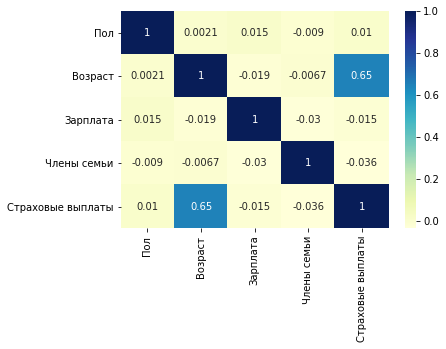

In [5]:
print(data.corr())  
data_plot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)  

plt.show()

Наибольшая зависимость в данных есть только между возрастом и страховыми выплатами

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** b 

Предсказания

$a = X w$

Формула обучения линейной регрессии

$w = (X^TX)^{-1}X^Tx$

Преобразуем выражение для w':

$w' = (Y^TY)^{-1} Y^Ty =$

$= ((XP)^T(XP))^{-1} (XP)^Ty =$

$= P^{-1}((XP)^{T}X)^{-1} (XP)^Ty =$

$= P^{-1}((XP)^{T}X)^{-1} P^TX^Ty =$

$= P^{-1}(P^TX^TX)^{-1} P^TX^Ty =$

$= P^{-1}(X^TX)^{-1}(P^T)^{-1} P^TX^Ty$

Сократим

$(P^{T})^{-1} P^T = P^{-1}(X^TX)^{-1} X^Ty$


Произведем замену

$w = (X^TX)^{-1}X^Ty = P^{-1}w$


Тогда: $w(y)= P^{-1}w$

Подставим для X' и w' в формулу для расчета a':

$a'=X'w' = XPP^{-1}w = Xw = a$


Выражения тождественны. Векторы предсказаний совпали.

## Алгоритм преобразования

**Алгоритм**

Выделяем features, target

Создадим квадратную матрицу как ключ

Подставляем и вычесляем модель

При необходимости дешифруем обратно датасет


**Обоснование**
Доказательство неизменности данных описано выше, где даказано, что a_1 = a, поэтому можно использовать матрицу как ключ.


## Проверка алгоритма

In [6]:
features = data.drop('Страховые выплаты', axis=1)
target = data['Страховые выплаты']

features_train, features_test, target_train, target_test = train_test_split(features, target,test_size=0.25, random_state=12345)



In [7]:
model = LinearRegression().fit(features_train, target_train)
predictions = model.predict(features_test)
print(r2_score(target_test, predictions))

0.43522757127026546


Для шифрования возьмем матрицу (можно любую, если она обратимая и совпадает по размерности)  обратную к нашей исходной. 


In [8]:
random = ([[randint(1,4) for j in range(4)] for i in range(4)])
random
inverse = np.linalg.inv(random)
np.array(random@inverse)


array([[ 1.00000000e+00,  0.00000000e+00,  9.02056208e-17,
        -8.32667268e-17],
       [ 1.11022302e-16,  1.00000000e+00, -8.32667268e-17,
        -1.11022302e-16],
       [ 2.77555756e-17,  5.55111512e-17,  1.00000000e+00,
        -2.77555756e-17],
       [ 2.77555756e-17,  5.55111512e-17, -5.06539255e-16,
         1.00000000e+00]])

In [9]:
features_1 = data.drop('Страховые выплаты', axis=1)
features_1 = features_1.values@random
target_1 = data['Страховые выплаты']

features_train_1, features_test_1, target_train_1, target_test_1 = train_test_split(features_1, target_1,test_size=0.25, random_state=12345)

In [10]:
model = LinearRegression().fit(features_train_1, target_train_1)
predictions_1 = model.predict(features_test_1)
print(r2_score(target_test_1, predictions_1))

0.43522757127025724


Видно, что метрики не отличаются

Общий вывод:

    Данный проект направлен на создание алгоритма шифрования для модели обучения. 
    
    Это необходимо для сохранения данных, так как чистые данные важный источник информации. 
    
    В данном проекте предложен алгоритм шифрования построенный на умножении исходных данных на квадратную, обратную матрицу. 
    
    Днный алгоритм проверен и доказано, что такой способ шифрования не влияет на качество модели. 
    